# < 직장인구_상권별_전처리 >
# < 4조 : 이가희 >

In [233]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)


# 데이터 및 분석 설명

**상권**별 **직장인구**에 관한 데이터 입니다   

**상권**별이기에 행정동 코드가 따로없고 대신 상권별로 구분되어있습니다(골목상권/발달상권/전통시장/관광특구)  

따라서 다른 상권구분이 되어있는데이터와 엮어서 분석하면 될 것 같습니다  

상권별로 전처리를 진행하였고, 2023년 1~3분기 데이터만 가지고 진행하였습니다  

**기준년도 / 상권 / 총 직장 인구수 / 성별 / 연령대별** 로 나뉘어져 있습니다   

성별 + 연령이 묶여있는데이터까지 모두 처리시 데이터의 양이 너무 작아져서 (약 96개 남음) 제외하고 처리했습니다

10대 인구는 연령 특성상 직장인의 수가 작아 매우 적은 값을 보이는 경향이 있습니다  

전처리 후 306 -> 213개의 데이터가 되었습니다  

# 직장인구- 상권
> 데이터프레임 
* 직장인구_상권 / 직장인구_상권_raw
* A / A_raw : 골목상권
* D / D_raw : 발달상권
* R / R_raw : 전통시장
* U / U_raw : 관광특구

# 진행과정 
0. 결측치 확인
1. 2023년 1~3분기 데이터 추출
2. 상권별로 데이터 프레임 나눔
3. 전처리를 위한 함수 작성
4. 상권별 이상치 개수 확인 / 제거 
5. 박스플롯으로 이상치 전후 데이터 시각화 
6. 데이터 통합
7. 전처리 전후의 통계값 비교
8. 데이터 프레임을 csv 파일로 저장 

# 앞으로 진행사항 
1. 상권코드 별로 분류..?
2. 상권별로 묶어진 데이터와 함께 상권코드를 결합해서(점포-상권) 분석을 해보면 좋을것 같습니다  
2-1. 상권별로 성별/연령대 별 어떠한 서비스 업종(음식점) 이 인기가 많은지   
2-2. 직장인구-상권시각화에서 예시로 남성 30대의 인구가 많다 -> 어떠한 서비스업종이 많고 매출이 많은지 그것이 유동인구와 관계가 있는지 확인

# 고민사항
1. 상권코드를 어떻게 구분할지 고민이다. 하나하나 처리하기에는 각자 변수가 너무 달라서 처리도 어려울것 같고 기준을 어떻게 잡아야할지 또 그 기준이 주관적인것 같아 고민중 
2. 성별+연령대별 데이터까지 모두 전처리를 하면 데이터가 96개이고 안하면 213개? 이정도 되는데 성별+연령대 데이터가 필요할까요? 필요할지 안할지 여부에 따라서 다시 진행하겠습니다

# 유의사항
1. 제 맥북이라... 경로가 절대경로 + 인코딩 값이 조금 다릅니다... 바꿔서 사용하셔야 해요 
2. 폰트도 애플고딕에서 나눔고딕으로 바꿔서 사용하셔야 플롯이 보일것 같아요... 

In [234]:
직장인구_상권= pd.read_csv('/Users/leegahee/git_folder/semi_project/강남구/직장인구-상권.csv',encoding='EUC-KR')
직장인구_상권_raw = 직장인구_상권.copy()
직장인구_상권.head()

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,연령대_10_직장_인구_수,연령대_20_직장_인구_수,...,남성연령대_30_직장_인구_수,남성연령대_40_직장_인구_수,남성연령대_50_직장_인구_수,남성연령대_60_이상_직장_인구_수,여성연령대_10_직장_인구_수,여성연령대_20_직장_인구_수,여성연령대_30_직장_인구_수,여성연령대_40_직장_인구_수,여성연령대_50_직장_인구_수,여성연령대_60_이상_직장_인구_수
0,20191,A,골목상권,3110980,개포지구대옆,613,361,252,2,95,...,78,104,82,66,2,64,69,56,43,18
1,20191,A,골목상권,3110950,논현역 7번,344,203,141,0,76,...,78,60,23,16,0,50,50,25,13,3
2,20191,D,발달상권,3120200,학동사거리,15890,7170,8720,119,5867,...,2671,1460,660,461,66,4002,2895,1175,383,199
3,20191,D,발달상권,3120223,휘문고교사거리,7590,4521,3069,27,1449,...,1769,1274,532,371,14,887,1116,564,279,209
4,20191,D,발달상권,3120210,선릉역,59677,30858,28819,276,16803,...,9517,7145,4609,2663,154,10001,7280,5451,4275,1658


# 0. 결측치 확인

In [235]:
직장인구_상권.isna().sum()

기준_년분기_코드              0
상권_구분_코드               0
상권_구분_코드_명             0
상권_코드                  0
상권_코드_명                0
총_직장_인구_수              0
남성_직장_인구_수             0
여성_직장_인구_수             0
연령대_10_직장_인구_수         0
연령대_20_직장_인구_수         0
연령대_30_직장_인구_수         0
연령대_40_직장_인구_수         0
연령대_50_직장_인구_수         0
연령대_60_이상_직장_인구_수      0
남성연령대_10_직장_인구_수       0
남성연령대_20_직장_인구_수       0
남성연령대_30_직장_인구_수       0
남성연령대_40_직장_인구_수       0
남성연령대_50_직장_인구_수       0
남성연령대_60_이상_직장_인구_수    0
여성연령대_10_직장_인구_수       0
여성연령대_20_직장_인구_수       0
여성연령대_30_직장_인구_수       0
여성연령대_40_직장_인구_수       0
여성연령대_50_직장_인구_수       0
여성연령대_60_이상_직장_인구_수    0
dtype: int64

# 1. 2023년 1~3분기 데이터 추출

In [236]:
직장인구_상권['기준_년분기_코드'].unique()

array([20191, 20212, 20221, 20222, 20223, 20224, 20231, 20232, 20233,
       20214, 20194, 20202, 20203, 20204, 20213, 20201, 20211])

In [237]:
condition = 직장인구_상권['기준_년분기_코드'].isin([20231, 20232, 20233, 20234])
직장인구_상권 = 직장인구_상권[condition]
직장인구_상권_raw = 직장인구_상권
직장인구_상권['기준_년분기_코드'].unique()

array([20231, 20232, 20233])

In [238]:
직장인구_상권.info()

<class 'pandas.core.frame.DataFrame'>
Index: 306 entries, 612 to 1733
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   기준_년분기_코드            306 non-null    int64 
 1   상권_구분_코드             306 non-null    object
 2   상권_구분_코드_명           306 non-null    object
 3   상권_코드                306 non-null    int64 
 4   상권_코드_명              306 non-null    object
 5   총_직장_인구_수            306 non-null    int64 
 6   남성_직장_인구_수           306 non-null    int64 
 7   여성_직장_인구_수           306 non-null    int64 
 8   연령대_10_직장_인구_수       306 non-null    int64 
 9   연령대_20_직장_인구_수       306 non-null    int64 
 10  연령대_30_직장_인구_수       306 non-null    int64 
 11  연령대_40_직장_인구_수       306 non-null    int64 
 12  연령대_50_직장_인구_수       306 non-null    int64 
 13  연령대_60_이상_직장_인구_수    306 non-null    int64 
 14  남성연령대_10_직장_인구_수     306 non-null    int64 
 15  남성연령대_20_직장_인구_수     306 non-null    int64 
 16  남성연령대_30_직

In [239]:
직장인구_상권['상권_구분_코드'].unique()
# A : 골목상권
# D : 발달상권
# R : 전통시장
# U : 관광특구

array(['D', 'A', 'R', 'U'], dtype=object)

In [240]:
A_raw = 직장인구_상권[직장인구_상권['상권_구분_코드'] == 'A']
D_raw = 직장인구_상권[직장인구_상권['상권_구분_코드'] == 'D']
R_raw = 직장인구_상권[직장인구_상권['상권_구분_코드'] == 'R']
U_raw = 직장인구_상권[직장인구_상권['상권_구분_코드'] == 'U']
A = A_raw.copy()
D = D_raw.copy()
R = R_raw.copy()
U = U_raw.copy()


In [241]:
len(A),len(D),len(R),len(U)

(162, 117, 24, 3)

# 3. 전처리를 위한 함수 작성

IQR 을 이용하여 이상치를 탐지하였습니다

In [242]:
import matplotlib.pyplot as plt

# IQR 계산
def iqr_cal(df, column):

    q25 = np.percentile(df[column].values,25)
    q75 = np.percentile(df[column].values,75)
    iqr = q75-q25
    iqr_weight = iqr*1.5
    low = q25 - iqr_weight
    high = q75+iqr_weight
    return low,high


In [243]:
# 이상치 탐지
def find_outlier_value(df,column):
    temp = []
    for i in df[column] :
        if  (i < iqr_cal(df,column)[0]) or (i > iqr_cal(df,column)[1]) :
            temp.append(i)
    return temp


In [244]:
# 이상치 탐지
def find_outlier_value_len(df,column):
    temp = []
    for i in df[column] :
        if  (i < iqr_cal(df,column)[0]) or (i > iqr_cal(df,column)[1]) :
            temp.append(i)
    print(f'{column} 에 이상치 {len(temp)} 개 존재')
    return temp


In [245]:
def find_outlier(df):
    outliers = []
    for i in range(5, 14):
        outliers.append(find_outlier_value_len(df, df.columns[i]))
    return outliers


In [246]:
def remove_outliers(df):
    for i in range(5,14):
        outliers = find_outlier_value(df,df.columns[i])
        df = df[~df.iloc[:,i].isin(outliers)]
    return df

# 4. 상권별 이상치 개수 확인 / 제거  
# 5. 박스플롯으로 이상치 전후 데이터 시각화 

# A : 골목상권

In [247]:
find_outlier(A)

총_직장_인구_수 에 이상치 6 개 존재
남성_직장_인구_수 에 이상치 6 개 존재
여성_직장_인구_수 에 이상치 6 개 존재
연령대_10_직장_인구_수 에 이상치 15 개 존재
연령대_20_직장_인구_수 에 이상치 15 개 존재
연령대_30_직장_인구_수 에 이상치 9 개 존재
연령대_40_직장_인구_수 에 이상치 6 개 존재
연령대_50_직장_인구_수 에 이상치 9 개 존재
연령대_60_이상_직장_인구_수 에 이상치 12 개 존재


[[10837, 5085, 10837, 5085, 10837, 5085],
 [6932, 3711, 6932, 3711, 6932, 3711],
 [3905, 1374, 3905, 1374, 3905, 1374],
 [34, 19, 17, 15, 18, 34, 19, 17, 15, 18, 34, 19, 17, 15, 18],
 [2175,
  719,
  829,
  978,
  679,
  2175,
  719,
  829,
  978,
  679,
  2175,
  719,
  829,
  978,
  679],
 [2199, 1305, 2002, 2199, 1305, 2002, 2199, 1305, 2002],
 [3202, 1271, 3202, 1271, 3202, 1271],
 [3019, 625, 637, 3019, 625, 637, 3019, 625, 637],
 [451, 459, 425, 901, 451, 459, 425, 901, 451, 459, 425, 901]]

In [248]:
A = remove_outliers(A)

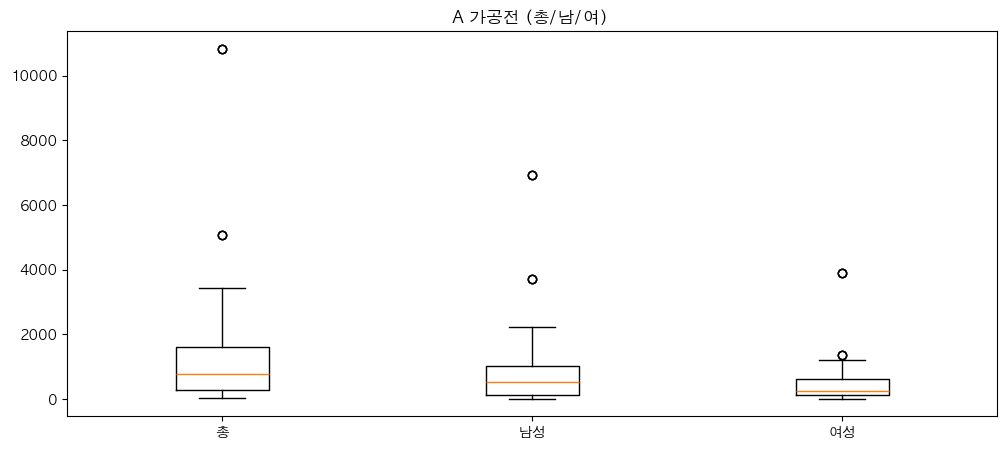

In [249]:
ax, pig = plt.subplots(figsize=(12,5))
label = ['총','남성','여성']
plt.title('A 가공전 (총/남/여) ')
plt.boxplot([A_raw.iloc[:,5], A_raw.iloc[:,6], A_raw.iloc[:,7]],labels=label)
plt.show()

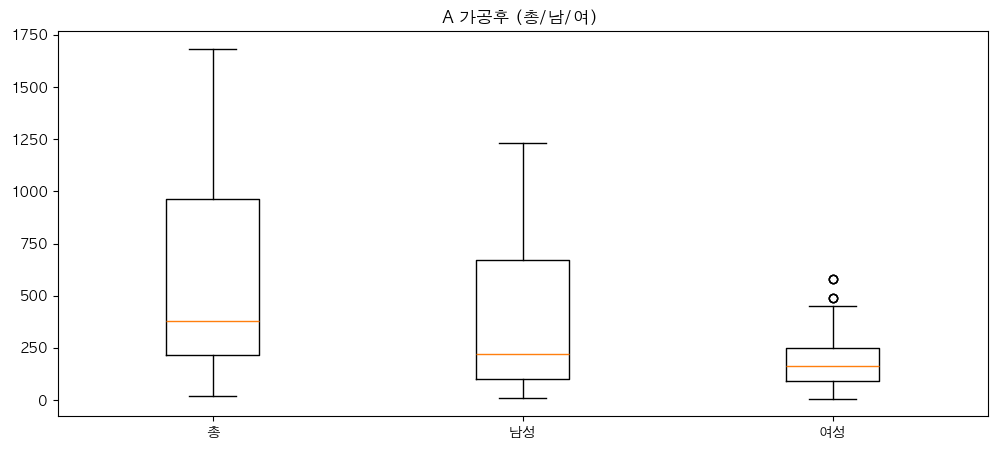

In [250]:
ax, pig = plt.subplots(figsize=(12,5))
label = ['총','남성','여성']
plt.title('A 가공후 (총/남/여) ')
plt.boxplot([A.iloc[:,5], A.iloc[:,6], A.iloc[:,7]],labels=label)
plt.show()

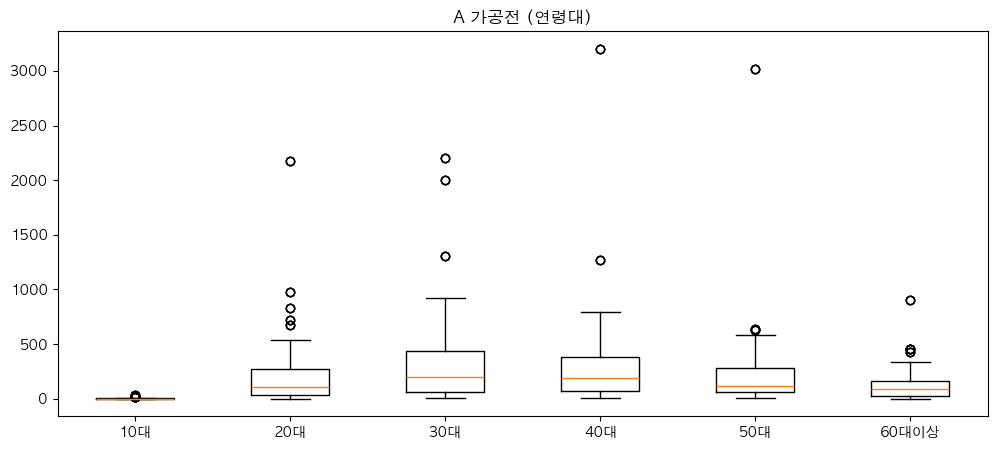

In [251]:
ax, pig = plt.subplots(figsize=(12,5))
label = ['10대','20대','30대','40대','50대','60대이상']
plt.title('A 가공전 (연령대)')
plt.boxplot([A_raw.iloc[:,8], A_raw.iloc[:,9], A_raw.iloc[:,10],A_raw.iloc[:,11],A_raw.iloc[:,12],A_raw.iloc[:,13]],labels=label)
plt.show()

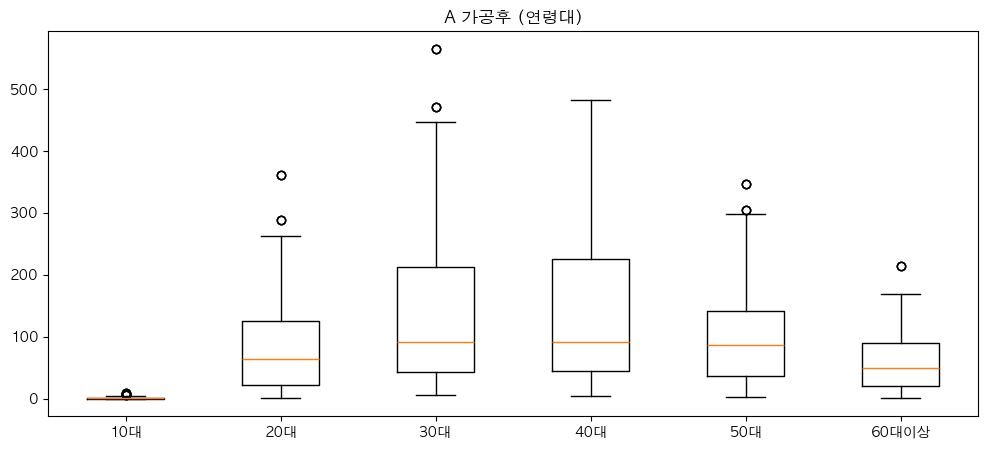

In [252]:
ax, pig = plt.subplots(figsize=(12,5))
label = ['10대','20대','30대','40대','50대','60대이상']
plt.title('A 가공후 (연령대)')
plt.boxplot([A.iloc[:,8], A.iloc[:,9], A.iloc[:,10],A.iloc[:,11],A.iloc[:,12],A.iloc[:,13]],labels=label)
plt.show()

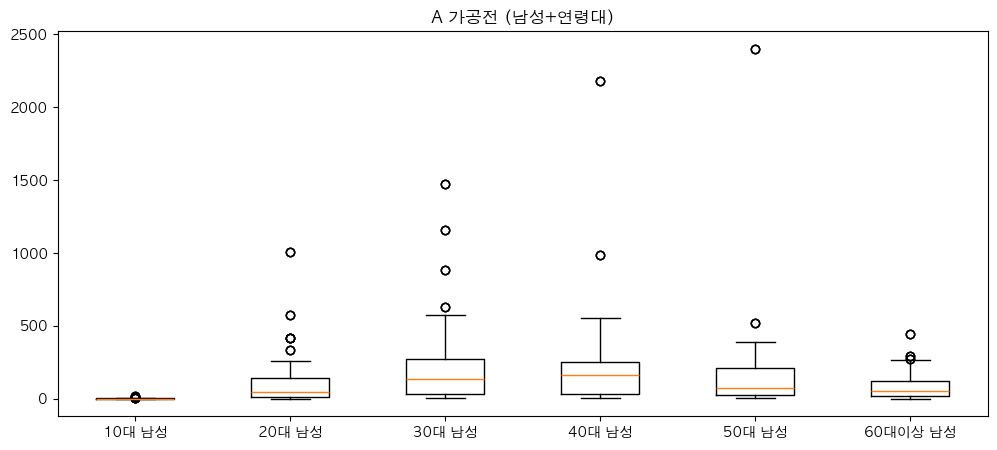

In [253]:
ax, pig = plt.subplots(figsize=(12,5))
label = ['10대 남성','20대 남성','30대 남성','40대 남성','50대 남성','60대이상 남성']
plt.title('A 가공전 (남성+연령대)')
plt.boxplot([A_raw.iloc[:,14], A_raw.iloc[:,15], A_raw.iloc[:,16],A_raw.iloc[:,17],A_raw.iloc[:,18],A_raw.iloc[:,19]],labels=label)
plt.show()

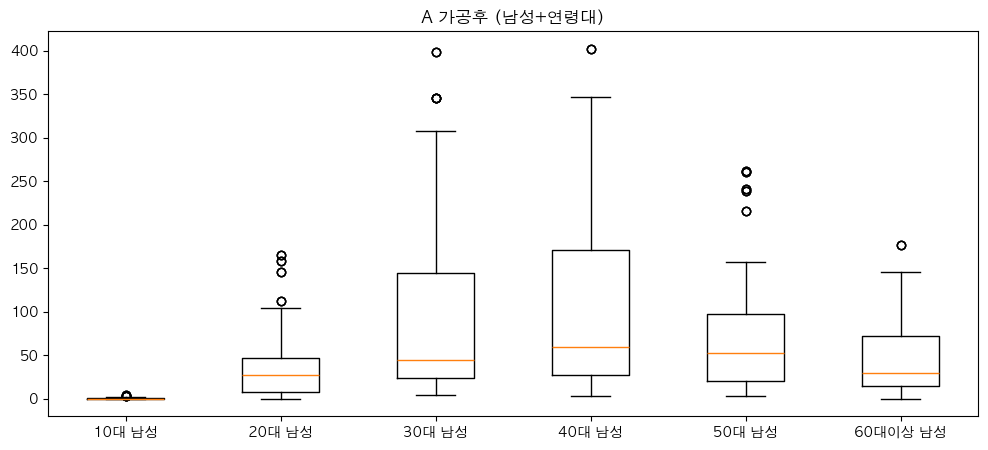

In [254]:
ax, pig = plt.subplots(figsize=(12,5))
label = ['10대 남성','20대 남성','30대 남성','40대 남성','50대 남성','60대이상 남성']
plt.title('A 가공후 (남성+연령대)')
plt.boxplot([A.iloc[:,14], A.iloc[:,15], A.iloc[:,16],A.iloc[:,17],A.iloc[:,18],A.iloc[:,19]],labels=label)
plt.show()

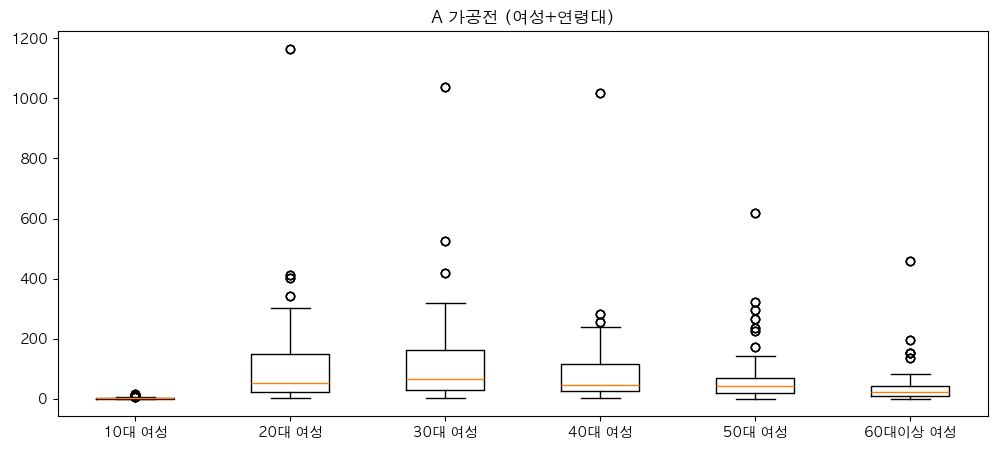

In [255]:
ax, pig = plt.subplots(figsize=(12,5))
label = ['10대 여성','20대 여성','30대 여성','40대 여성','50대 여성','60대이상 여성']
plt.title('A 가공전 (여성+연령대)')
plt.boxplot([A_raw.iloc[:,20], A_raw.iloc[:,21], A_raw.iloc[:,22],A_raw.iloc[:,23],A_raw.iloc[:,24],A_raw.iloc[:,25]],labels=label)
plt.show()

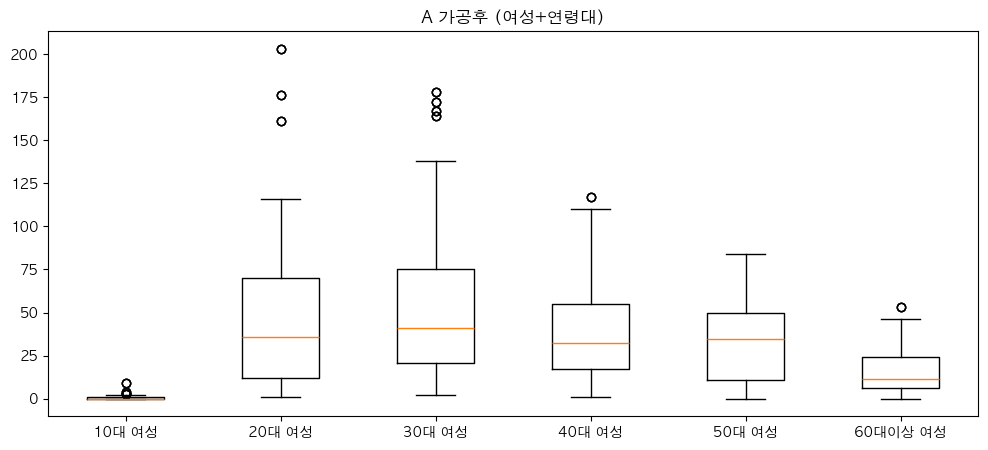

In [256]:
ax, pig = plt.subplots(figsize=(12,5))
label = ['10대 여성','20대 여성','30대 여성','40대 여성','50대 여성','60대이상 여성']
plt.title('A 가공후 (여성+연령대)')
plt.boxplot([A.iloc[:,20], A.iloc[:,21], A.iloc[:,22],A.iloc[:,23],A.iloc[:,24],A.iloc[:,25]],labels=label)
plt.show()

# D : 발달상권

In [257]:
find_outlier(D)

총_직장_인구_수 에 이상치 18 개 존재
남성_직장_인구_수 에 이상치 18 개 존재
여성_직장_인구_수 에 이상치 18 개 존재
연령대_10_직장_인구_수 에 이상치 6 개 존재
연령대_20_직장_인구_수 에 이상치 15 개 존재
연령대_30_직장_인구_수 에 이상치 18 개 존재
연령대_40_직장_인구_수 에 이상치 18 개 존재
연령대_50_직장_인구_수 에 이상치 21 개 존재
연령대_60_이상_직장_인구_수 에 이상치 6 개 존재


[[27363,
  61667,
  41471,
  43324,
  48780,
  58731,
  27363,
  61667,
  41471,
  43324,
  48780,
  58731,
  61667,
  41471,
  43324,
  48780,
  58731,
  27363],
 [18865,
  40706,
  20644,
  24141,
  26797,
  38593,
  18865,
  40706,
  20644,
  24141,
  26797,
  38593,
  40706,
  20644,
  24141,
  26797,
  38593,
  18865],
 [20961,
  20827,
  11378,
  19183,
  21983,
  20138,
  20961,
  20827,
  11378,
  19183,
  21983,
  20138,
  20961,
  20827,
  11378,
  19183,
  21983,
  20138],
 [202, 244, 202, 244, 202, 244],
 [9756,
  8167,
  8091,
  11358,
  10093,
  9756,
  8167,
  8091,
  11358,
  10093,
  9756,
  8167,
  8091,
  11358,
  10093],
 [8234,
  22506,
  11056,
  13641,
  13636,
  18065,
  8234,
  22506,
  11056,
  13641,
  13636,
  18065,
  22506,
  11056,
  13641,
  13636,
  18065,
  8234],
 [6678,
  18178,
  10671,
  10294,
  11065,
  15897,
  6678,
  18178,
  10671,
  10294,
  11065,
  15897,
  18178,
  10671,
  10294,
  11065,
  15897,
  6678],
 [4352,
  8408,
  10081,
  4061

In [258]:
D = remove_outliers(D)

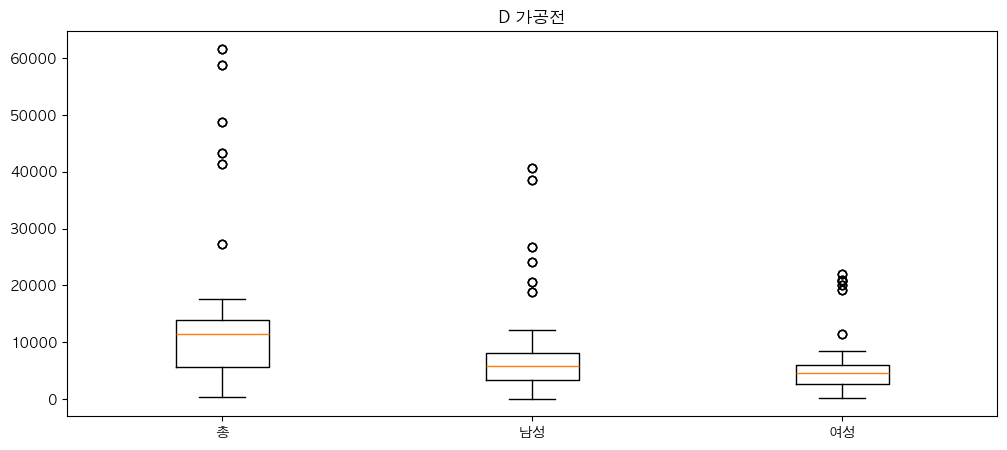

In [259]:
ax, pig = plt.subplots(figsize=(12,5))
label = ['총','남성','여성']
plt.title('D 가공전')
plt.boxplot([D_raw.iloc[:,5], D_raw.iloc[:,6], D_raw.iloc[:,7]],labels=label)
plt.show()

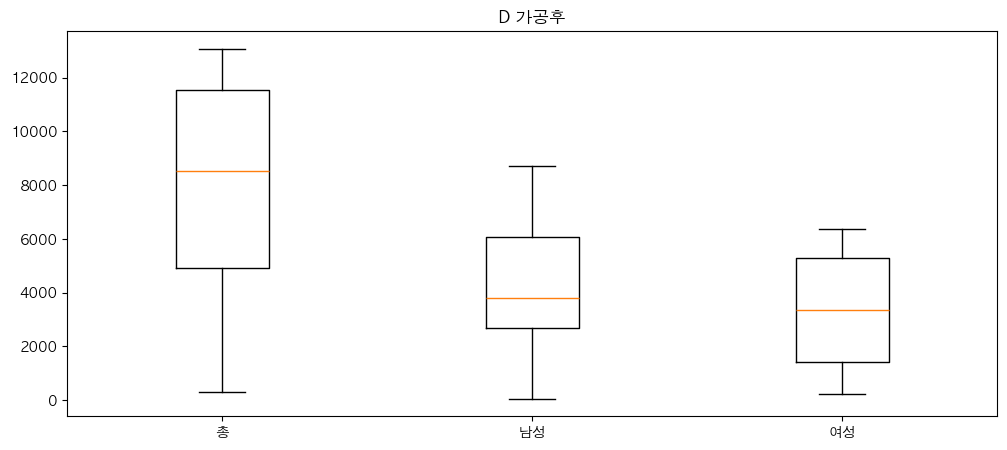

In [260]:
ax, pig = plt.subplots(figsize=(12,5))
label = ['총','남성','여성']
plt.title('D 가공후')
plt.boxplot([D.iloc[:,5], D.iloc[:,6], D.iloc[:,7]],labels=label)
plt.show()

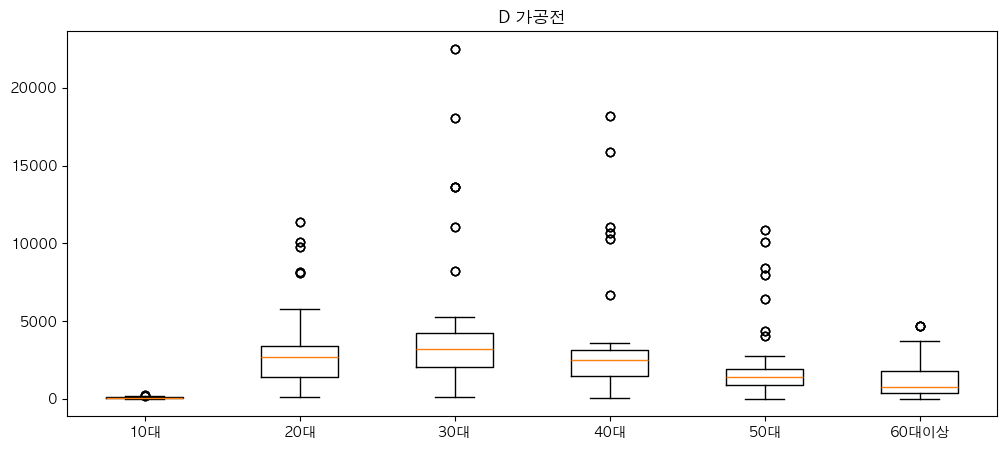

In [261]:
ax, pig = plt.subplots(figsize=(12,5))
label = ['10대','20대','30대','40대','50대','60대이상']
plt.title('D 가공전')
plt.boxplot([D_raw.iloc[:,8], D_raw.iloc[:,9], D_raw.iloc[:,10],D_raw.iloc[:,11],D_raw.iloc[:,12],D_raw.iloc[:,13]],labels=label)
plt.show()

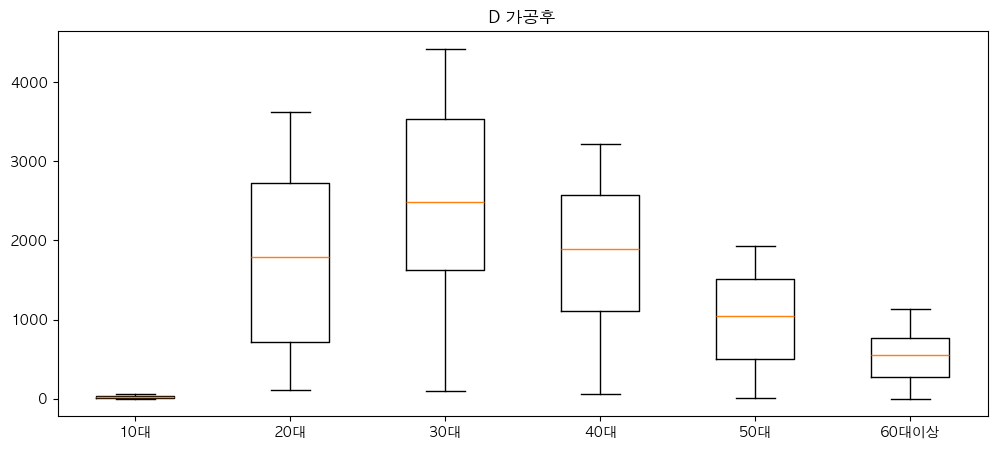

In [262]:
ax, pig = plt.subplots(figsize=(12,5))
label = ['10대','20대','30대','40대','50대','60대이상']
plt.title('D 가공후')
plt.boxplot([D.iloc[:,8], D.iloc[:,9], D.iloc[:,10],D.iloc[:,11],D.iloc[:,12],D.iloc[:,13]],labels=label)
plt.show()

# R : 전통시장

In [263]:
find_outlier(R)

총_직장_인구_수 에 이상치 0 개 존재
남성_직장_인구_수 에 이상치 0 개 존재
여성_직장_인구_수 에 이상치 0 개 존재
연령대_10_직장_인구_수 에 이상치 3 개 존재
연령대_20_직장_인구_수 에 이상치 0 개 존재
연령대_30_직장_인구_수 에 이상치 0 개 존재
연령대_40_직장_인구_수 에 이상치 0 개 존재
연령대_50_직장_인구_수 에 이상치 0 개 존재
연령대_60_이상_직장_인구_수 에 이상치 0 개 존재


[[], [], [], [2, 2, 2], [], [], [], [], []]

In [264]:
R = remove_outliers(R)

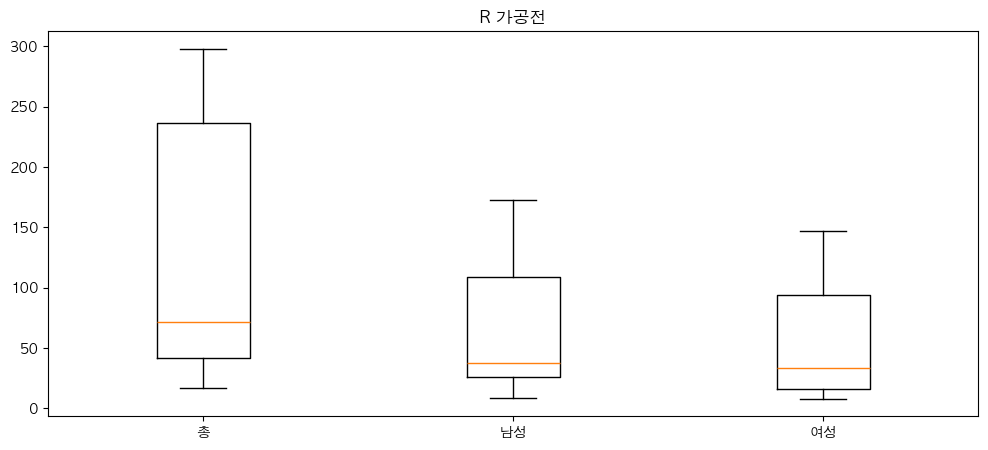

In [265]:
ax, pig = plt.subplots(figsize=(12,5))
label = ['총','남성','여성']
plt.title('R 가공전')
plt.boxplot([R_raw.iloc[:,5], R_raw.iloc[:,6], R_raw.iloc[:,7]],labels=label)
plt.show()

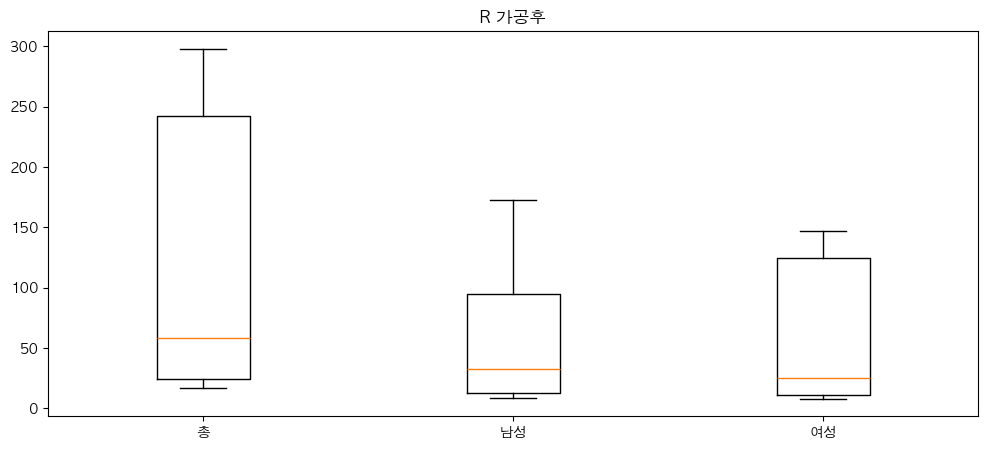

In [266]:
ax, pig = plt.subplots(figsize=(12,5))
label = ['총','남성','여성']
plt.title('R 가공후')
plt.boxplot([R.iloc[:,5], R.iloc[:,6], R.iloc[:,7]],labels=label)
plt.show()

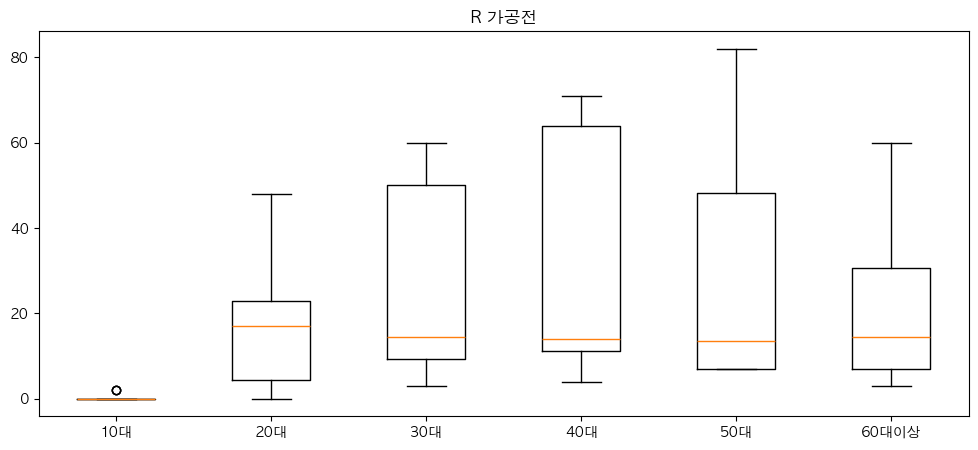

In [267]:
ax, pig = plt.subplots(figsize=(12,5))
label = ['10대','20대','30대','40대','50대','60대이상']
plt.title('R 가공전')
plt.boxplot([R_raw.iloc[:,8], R_raw.iloc[:,9], R_raw.iloc[:,10],R_raw.iloc[:,11],R_raw.iloc[:,12],R_raw.iloc[:,13]],labels=label)
plt.show()

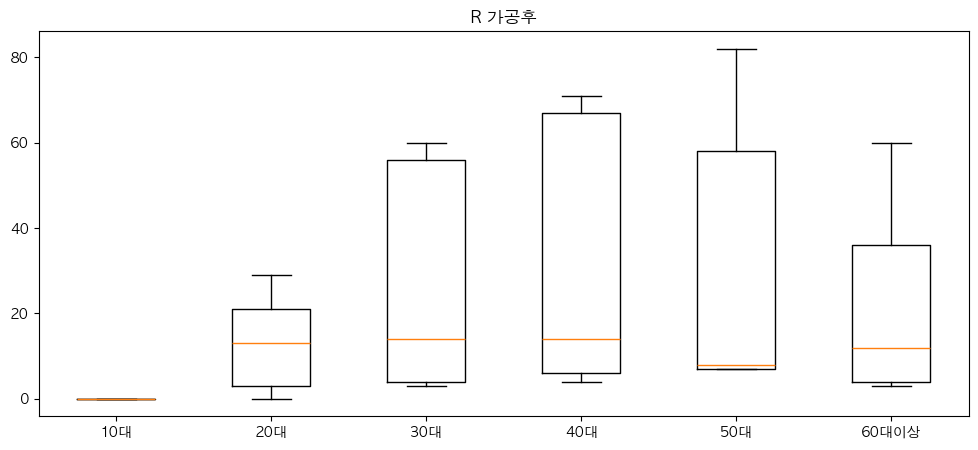

In [268]:
ax, pig = plt.subplots(figsize=(12,5))
label = ['10대','20대','30대','40대','50대','60대이상']
plt.title('R 가공후')
plt.boxplot([R.iloc[:,8], R.iloc[:,9], R.iloc[:,10],R.iloc[:,11],R.iloc[:,12],R.iloc[:,13]],labels=label)
plt.show()

# U : 관광특구

In [269]:
find_outlier(U)

총_직장_인구_수 에 이상치 0 개 존재
남성_직장_인구_수 에 이상치 0 개 존재
여성_직장_인구_수 에 이상치 0 개 존재
연령대_10_직장_인구_수 에 이상치 0 개 존재
연령대_20_직장_인구_수 에 이상치 0 개 존재
연령대_30_직장_인구_수 에 이상치 0 개 존재
연령대_40_직장_인구_수 에 이상치 0 개 존재
연령대_50_직장_인구_수 에 이상치 0 개 존재
연령대_60_이상_직장_인구_수 에 이상치 0 개 존재


[[], [], [], [], [], [], [], [], []]

# 6. 데이터 통합

In [270]:
직장인구_상권 = pd.concat([A,D,R,U])
직장인구_상권['상권_구분_코드'].unique()

array(['A', 'D', 'R', 'U'], dtype=object)

In [271]:
직장인구_상권.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213 entries, 619 to 1666
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   기준_년분기_코드            213 non-null    int64 
 1   상권_구분_코드             213 non-null    object
 2   상권_구분_코드_명           213 non-null    object
 3   상권_코드                213 non-null    int64 
 4   상권_코드_명              213 non-null    object
 5   총_직장_인구_수            213 non-null    int64 
 6   남성_직장_인구_수           213 non-null    int64 
 7   여성_직장_인구_수           213 non-null    int64 
 8   연령대_10_직장_인구_수       213 non-null    int64 
 9   연령대_20_직장_인구_수       213 non-null    int64 
 10  연령대_30_직장_인구_수       213 non-null    int64 
 11  연령대_40_직장_인구_수       213 non-null    int64 
 12  연령대_50_직장_인구_수       213 non-null    int64 
 13  연령대_60_이상_직장_인구_수    213 non-null    int64 
 14  남성연령대_10_직장_인구_수     213 non-null    int64 
 15  남성연령대_20_직장_인구_수     213 non-null    int64 
 16  남성연령대_30_직

In [272]:
직장인구_상권.to_csv('./직장인구상권_전처리.csv')

남성/여성 연령대는 분석이 너무 복잡해지기도 하고 필요하지도 않을것 같아 제외

In [273]:
직장인구_상권 = 직장인구_상권.iloc[:,:14]
직장인구_상권.head()

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,연령대_10_직장_인구_수,연령대_20_직장_인구_수,연령대_30_직장_인구_수,연령대_40_직장_인구_수,연령대_50_직장_인구_수,연령대_60_이상_직장_인구_수
619,20231,A,골목상권,3110974,언주중학교,278,168,110,3,58,66,85,43,23
630,20231,A,골목상권,3110991,삼성중앙역 5번,1246,794,452,1,111,415,339,275,105
631,20231,A,골목상권,3111000,대왕초등학교(세곡동사거리서남측),39,20,19,0,7,10,12,8,2
632,20231,A,골목상권,3110999,윗방죽마을공원,268,130,138,2,19,43,44,83,77
634,20231,A,골목상권,3110963,역삼월드메르디앙아파트,779,545,234,1,126,183,226,154,89


# 7. 전처리 전후의 통계값 비교

In [274]:
직장인구_상권_raw.iloc[:,5:14].describe()

,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,연령대_10_직장_인구_수,연령대_20_직장_인구_수,연령대_30_직장_인구_수,연령대_40_직장_인구_수,연령대_50_직장_인구_수,연령대_60_이상_직장_인구_수
count,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000
mean,6442.294118,3774.970588,2667.323529,23.705882,1330.941176,1967.558824,1568.166667,1025.049020,526.872549
std,11509.985446,7014.589631,4680.130165,43.125799,2227.044582,3647.837258,3005.356729,1970.617099,908.522768
min,17.000000,9.000000,6.000000,0.000000,0.000000,3.000000,4.000000,3.000000,0.000000
25%,331.000000,186.000000,149.000000,0.000000,61.000000,83.000000,82.000000,82.000000,41.000000
50%,1575.000000,987.500000,598.000000,5.000000,265.500000,432.500000,376.000000,280.000000,156.000000
75%,8987.000000,4602.000000,3784.000000,26.000000,1869.000000,2485.000000,1911.000000,1172.000000,580.000000
max,61667.000000,40706.000000,21983.000000,244.000000,11358.000000,22506.000000,18178.000000,10840.000000,4669.000000


In [275]:
직장인구_상권.iloc[:,5:14].describe()

,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,연령대_10_직장_인구_수,연령대_20_직장_인구_수,연령대_30_직장_인구_수,연령대_40_직장_인구_수,연령대_50_직장_인구_수,연령대_60_이상_직장_인구_수
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,3240.633803,1855.549296,1385.084507,10.478873,733.140845,1046.887324,776.633803,445.394366,228.098592
std,4433.679541,2536.021301,2000.759715,16.013726,1096.790011,1494.282922,1063.172299,575.130547,297.176103
min,17.000000,9.000000,6.000000,0.000000,0.000000,3.000000,4.000000,3.000000,0.000000
25%,267.000000,109.000000,125.000000,0.000000,29.000000,60.000000,59.000000,43.000000,24.000000
50%,779.000000,516.000000,246.000000,1.000000,116.000000,197.000000,199.000000,140.000000,89.000000
75%,5716.000000,3394.000000,2586.000000,15.000000,1316.000000,2070.000000,1493.000000,895.000000,298.000000
max,15904.000000,8904.000000,7000.000000,64.000000,3624.000000,6185.000000,4248.000000,1923.000000,1136.000000


# 8. 데이터 프레임을 csv 파일로 저장 

In [276]:
직장인구_상권.head()

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,연령대_10_직장_인구_수,연령대_20_직장_인구_수,연령대_30_직장_인구_수,연령대_40_직장_인구_수,연령대_50_직장_인구_수,연령대_60_이상_직장_인구_수
619,20231,A,골목상권,3110974,언주중학교,278,168,110,3,58,66,85,43,23
630,20231,A,골목상권,3110991,삼성중앙역 5번,1246,794,452,1,111,415,339,275,105
631,20231,A,골목상권,3111000,대왕초등학교(세곡동사거리서남측),39,20,19,0,7,10,12,8,2
632,20231,A,골목상권,3110999,윗방죽마을공원,268,130,138,2,19,43,44,83,77
634,20231,A,골목상권,3110963,역삼월드메르디앙아파트,779,545,234,1,126,183,226,154,89


In [277]:
직장인구_상권.to_csv('./직장인구상권_전처리_전체.csv')

In [278]:
직장인구_상권 = 직장인구_상권.loc[ :,['기준_년분기_코드','상권_구분_코드_명','상권_코드','상권_코드_명','총_직장_인구_수','남성_직장_인구_수','여성_직장_인구_수','연령대_10_직장_인구_수','연령대_20_직장_인구_수','연령대_30_직장_인구_수','연령대_40_직장_인구_수','연령대_50_직장_인구_수','연령대_60_이상_직장_인구_수'] ]

In [279]:
직장인구_상권.to_csv('./직장인구상권_전처리_요약.csv')